In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [2]:
df = pd.read_csv(r"D:\python folders\datasets\cereal.csv")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


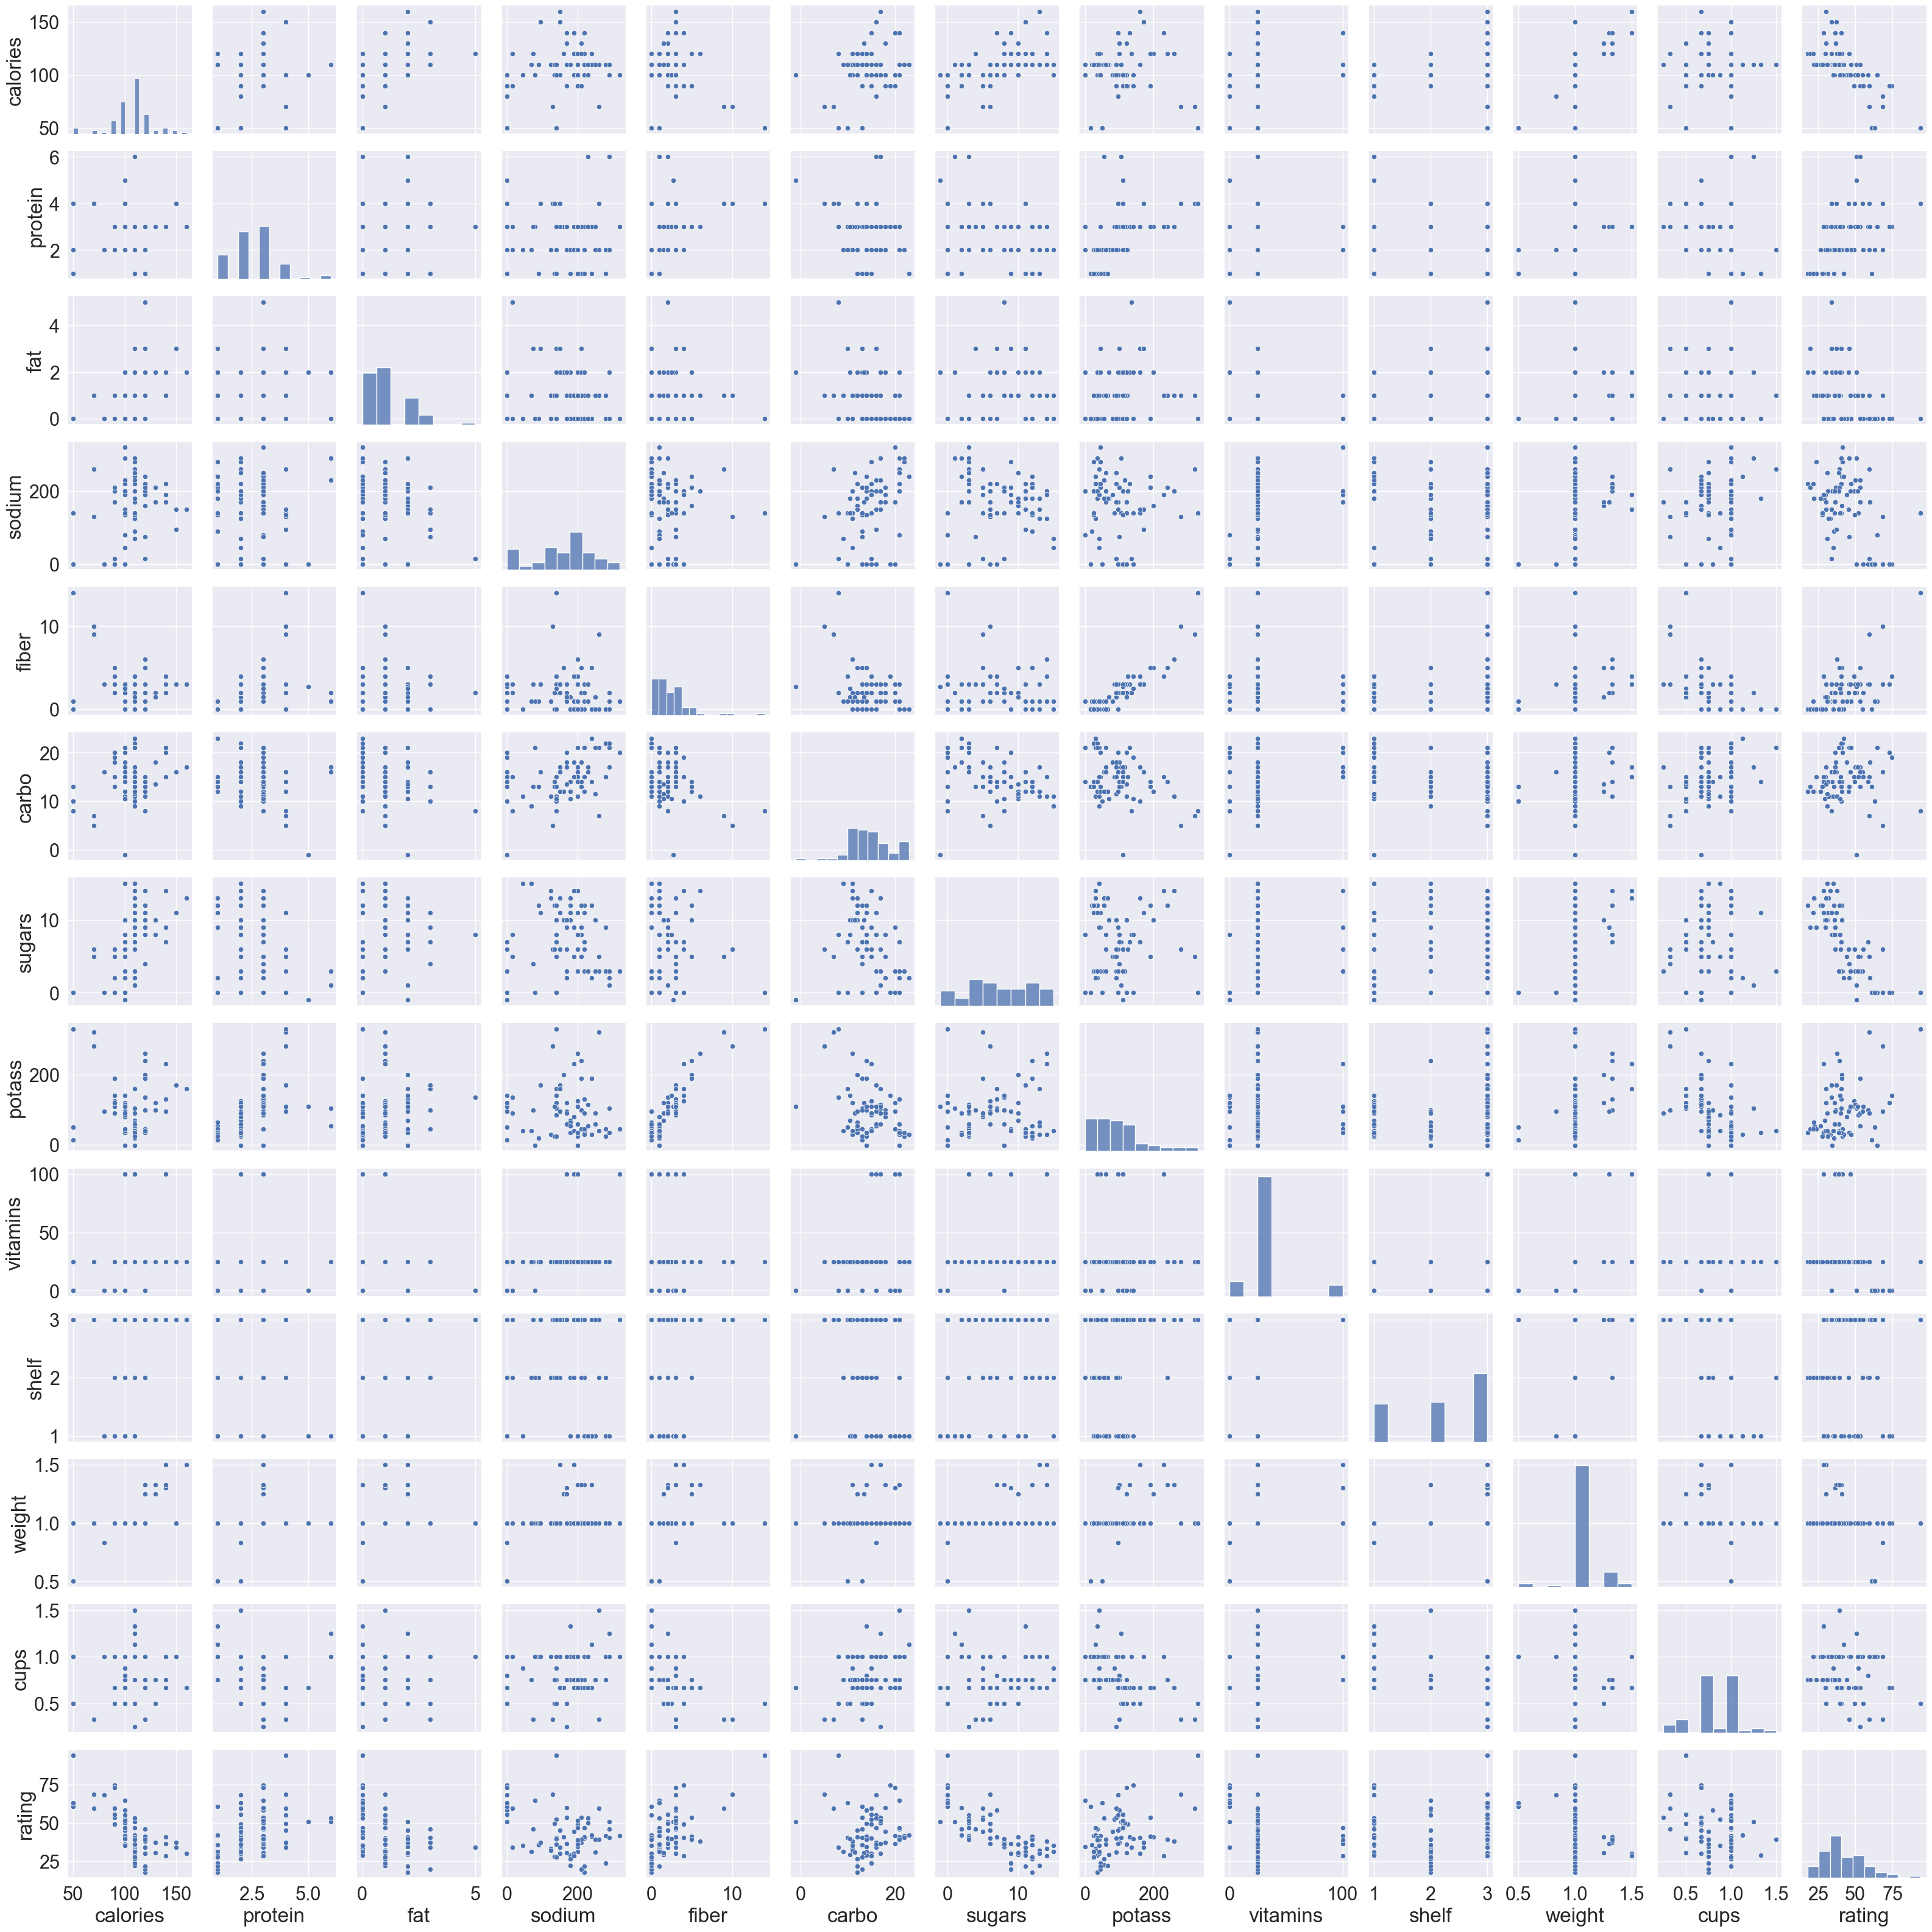

In [3]:
sns.set(font_scale=2)
sns.pairplot(df[['calories',	'protein',	'fat',	'sodium',	'fiber',	'carbo',	'sugars',	'potass',	'vitamins',	'shelf',	'weight',	'cups', 'rating']])


In [4]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [5]:
df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [6]:
X = df.drop(['mfr', 'name', 'type','rating'], axis=1)
X.shape

(77, 12)

In [7]:
y = df['rating']
y.shape


(77,)

In [8]:
from sklearn.linear_model import LinearRegression


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53, 12), (24, 12), (53,), (24,))

In [12]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [13]:
y_hat = linreg.predict(X_test)
y_hat, y_test

(array([40.69232049, 44.33085549, 60.75611154, 51.59219295, 59.42550458,
        36.47151218, 31.07221733, 32.20758155, 59.64283657, 40.56015889,
        39.24111424, 35.2524438 , 40.44877244, 68.23588467, 19.82357272,
        35.7827907 , 27.75330108, 28.59278467, 37.13686358, 45.32807423,
        31.23005448, 50.8283912 , 41.50353994, 53.31381271]),
 49    40.692320
 23    44.330856
 54    60.756112
 75    51.592193
 2     59.425505
 39    36.471512
 36    31.072217
 24    32.207582
 50    59.642837
 62    40.560159
 40    39.241114
 30    35.252444
 19    40.448772
 63    68.235885
 12    19.823573
 17    35.782791
 73    27.753301
 70    28.592785
 44    37.136863
 41    45.328074
 66    31.230054
 57    50.828392
 53    41.503540
 9     53.313813
 Name: rating, dtype: float64)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
print('mean squared error : ', mean_squared_error(y_hat, y_test))
print()
print('R2 score : ', r2_score(y_hat, y_test))
print()
print('root mean squared error: ', np.sqrt(mean_squared_error(y_hat, y_test)))

mean squared error :  1.4458435901181277e-13

R2 score :  0.999999999999999

root mean squared error:  3.802425002703048e-07


In [16]:
validation_set= X[33:66]
validation_set

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
33,110,3,0,170,3.0,17.0,3,90,25,3,1.00,0.25
34,120,3,3,75,3.0,13.0,4,100,25,3,1.00,0.33
35,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00
36,110,3,1,250,1.5,11.5,10,90,25,1,1.00,0.75
37,110,1,0,180,0.0,14.0,11,35,25,1,1.00,1.33
38,110,2,1,170,1.0,17.0,6,60,100,3,1.00,1.00
39,140,3,1,170,2.0,20.0,9,95,100,3,1.30,0.75
40,110,2,1,260,0.0,21.0,3,40,25,2,1.00,1.50
41,100,4,2,150,2.0,12.0,6,95,25,2,1.00,0.67
42,110,2,1,180,0.0,12.0,12,55,25,2,1.00,1.00


In [17]:
y_pred = linreg.predict(validation_set)
y_pred

array([53.37100718, 45.81171599, 21.87129225, 31.07221733, 28.74241352,
       36.52368329, 36.47151218, 39.24111424, 45.32807423, 26.73451536,
       54.85091707, 37.13686358, 34.13976494, 30.31335109, 40.1059649 ,
       29.92428523, 40.69232049, 59.64283657, 30.45084337, 37.84059391,
       41.50353994, 60.75611154, 63.00564502, 49.5118743 , 50.8283912 ,
       39.25919732, 39.70339966, 55.33314182, 41.99893293, 40.56015889,
       68.23588467, 74.47294876, 72.80178695])

In [18]:
pred_df = pd.DataFrame(y_pred, columns=['Predicted Values'])
pred_df

,Predicted Values
0,53.371007
1,45.811716
2,21.871292
3,31.072217
4,28.742414
5,36.523683
6,36.471512
7,39.241114
8,45.328074
9,26.734515


In [19]:
y_df = pd.DataFrame(y[33:66])
y_df

,rating
33,53.371007
34,45.811716
35,21.871292
36,31.072217
37,28.742414
38,36.523683
39,36.471512
40,39.241114
41,45.328074
42,26.734515


In [26]:
# comparision of actual and predicted values using a new dataframe

com_df = pd.concat([y_df, pred_df], ignore_index=True)
com_df

,rating,Predicted Values
0,53.371007,NaN
1,45.811716,NaN
2,21.871292,NaN
3,31.072217,NaN
4,28.742414,NaN
...,...,...
61,NaN,41.998933
62,NaN,40.560159
63,NaN,68.235885
64,NaN,74.472949
